Probability of waiting between 2 and 4 hours: 2.0413631323947153e-07


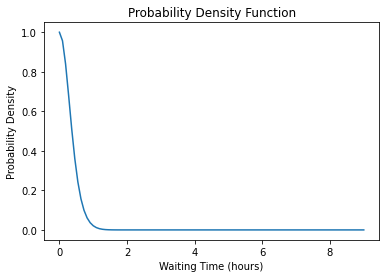

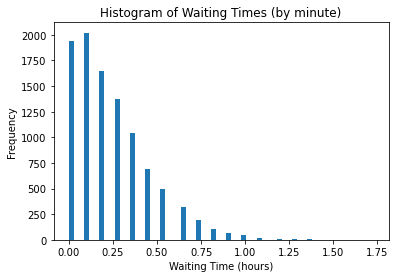

Mean: 0.24196363636363635
Variance: 0.04931971438016529
Quartiles: [0.09090909 0.18181818 0.36363636]


In [34]:
# import scipy
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from scipy.integrate import quad
import scipy.stats as stats
import seaborn as sns


# Define constants for the probability distribution function
E5 = 41/99
E6 = 3
E7 = 58/99
E8 = 7

# Define a function that returns the value of the probability distribution function for a given y
def pdf(y):
    # Use the numpy exp function to calculate the exponential terms
    return (E5 * np.exp(-E6 * (y ** 2))) + (E7 * np.exp(-E8 * (y ** 2)))


from scipy.integrate import quad

probability, _ = quad(pdf, 2, 4)

print("Probability of waiting between 2 and 4 hours:", probability)


x = np.linspace(0, 9, 100)  # Adjust the range and number of points as neede

y = pdf(x)

import matplotlib.pyplot as plt

plt.plot(x, y)
plt.xlabel('Waiting Time (hours)')
plt.ylabel('Probability Density')
plt.title('Probability Density Function')
plt.show()


# x: the 1-D array or an integer to generate samples from. If an integer, it is treated as if it were np.arange(x)
# size: the output shape of the random sample. Default is None, which returns a single value
# p: the probabilities associated with each entry in x. If not given, the sample assumes a uniform distribution over all entries in x
# y: an array-like object that is used to calculate the probabilities for each entry in x by dividing it by its sum
# The function call returns:

# an ndarray of shape (10000,) containing random samples from x with probabilities given by y/np.sum(y)

waiting_times = np.random.choice(x, size=10000, p=y/np.sum(y))

plt.hist(waiting_times, bins=60)
plt.xlabel('Waiting Time (hours)')
plt.ylabel('Frequency')
plt.title('Histogram of Waiting Times (by minute)')
plt.show()


mean = np.mean(waiting_times)
print("Mean:", mean)
variance = np.var(waiting_times)
print("Variance:", variance)
quartiles = np.percentile(waiting_times, [25, 50, 75])
print("Quartiles:", quartiles)

import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import quad





In [1]:


# import matplotlib.pyplot as plt
# plt.figure()
# plt.xlabel('Hours of waiting before hearing the owl')
# plt.ylabel('Probability')
# plt.title('Histogram')
# plt.bar(minutes[:-1], hist_values, width=0.1, label='histogram')
# plt.axvline(mean, color='red', label='mean')
# plt.axvline(median, color='green', label='median')
# plt.axvline(q1, color='blue', label='q1')

# plt.axvline(q2, color='orange', label='q2')

# plt.axvline(q3, color='purple', label='q3')
# plt.axvline(q4, color='black', label='q4')
# plt.legend(loc='upper right')
# plt.show()

# # Import seaborn
# import seaborn as sns

# # Set the style and color palette
# sns.set_style('whitegrid')
# sns.set_palette('muted')

# # Plot the probability density function values using a line
# plt.plot(minutes[1:-1], pdf_values, color='black', label='pdf')

# # Set the legend location
# plt.legend(loc='upper right')

# # Display the plot
# plt.show()

# import numpy as np
# import matplotlib.pyplot as plt
# from scipy.integrate import quad

# # Define a custom style for the plots
# plt.style.use('seaborn')
# plt.rcParams['font.size'] = 14
# plt.rcParams['figure.figsize'] = (10, 6)

# # Plot the probability density function
# plt.plot(x, y, color='blue', linewidth=3)
# plt.xlabel('Waiting Time (hours)')
# plt.ylabel('Probability Density')
# plt.title('Probability Density Function')
# plt.grid(True)
# plt.show()

# # Sample waiting times from the probability density function
# waiting_times = np.random.choice(x, size=10000, p=y/np.sum(y))

# # Plot the histogram of waiting times
# plt.hist(waiting_times, bins=60, color='green', edgecolor='black')
# plt.xlabel('Waiting Time (hours)')
# plt.ylabel('Frequency')
# plt.title('Histogram of Waiting Times (by minute)')
# plt.grid(True)
# plt.show()

# # Calculate and print some statistics
# mean = np.mean(waiting_times)
# print("Mean:", mean)
# variance = np.var(waiting_times)
# print("Variance:", variance)
# quartiles = np.percentile(waiting_times, [25, 50, 75])
# print("Quartiles:", quartiles)



In [1]:
import math
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# # Define the probability function
# def probability(y, xi):
#   if xi[4] == 0:
#     return xi[5] * math.exp(-xi[6] * y) + xi[7] * math.exp(-xi[8] * y)
#   elif xi[4] == 1:
#     return xi[5] * math.exp(-xi[6] * y**2) + xi[7] * math.exp(-xi[8] * y**8)
#   elif xi[4] == 2:
#     return xi[5] * math.exp(-xi[6] * y) + xi[7] * math.exp(-xi[8] * y**3)
#   else:
#     return xi[5] * math.exp(-xi[6] * y**2) + xi[7] * math.exp(-xi[8] * y**2)


# Define a function that returns the value of the probability distribution function for a given y
def pdf(y):
    # Use the numpy exp function to calculate the exponential terms
    return (E5 * np.exp(-E6 * (y ** 2))) + (E7 * np.exp(-E8 * (y ** 2)))
    
# Define the cumulative distribution function using numerical integration
def cdf(y, xi):
  # Create an array of values from 0 to y with a small step
  ys = np.arange(0, y, 0.01)
  # Calculate the probability for each value
  ps = [probability(y, xi) for y in ys]
  # Sum up the probabilities and multiply by the step size
  return np.sum(ps) * 0.01

# Define some sample values for xi
xi = [0.5, 0.3, 0.1, 0.2, 3]

# Calculate the probability of waiting between 2 and 4 hours
p_2_4 = cdf(4, xi) - cdf(2, xi)
print(f"The probability of waiting between 2 and 4 hours is {p_2_4:.3f}")

# Generate some random samples from the probability function
samples = []
for i in range(1000):
  # Generate a random number between 0 and 1
  u = np.random.uniform()
  # Find the value of y that satisfies cdf(y) = u using binary search
  low = 0
  high = 10
  while high - low > 0.01:
    mid = (low + high) / 2
    if cdf(mid, xi) < u:
      low = mid
    else:
      high = mid
  # Append the value of y to the samples list
  samples.append(mid)

# Convert the samples to minutes
samples = [s * 60 for s in samples]

# Plot the probability density function using seaborn
sns.kdeplot(samples, label="PDF", color="blue")

# Plot the histogram using seaborn
sns.histplot(samples, label="Histogram", color="orange", stat="probability", kde=False)

# Calculate and plot the mean, variance and quartiles using matplotlib.pyplot
mean = np.mean(samples)
var = np.var(samples)
q1 = np.quantile(samples, 0.25)
q2 = np.quantile(samples, 0.5)
q3 = np.quantile(samples, 0.75)
plt.axvline(mean, label="Mean", color="green")
plt.axvline(var, label="Variance", color="red")
plt.axvline(q1, label="Q1", color="purple")
plt.axvline(q2, label="Q2", color="cyan")
plt.axvline(q3, label="Q3", color="pink")

# Add title and legend to the plot
plt.title("Probability density function and histogram by minute")
plt.legend()

# Show the plot
plt.show()


NameError: name 'probability' is not defined